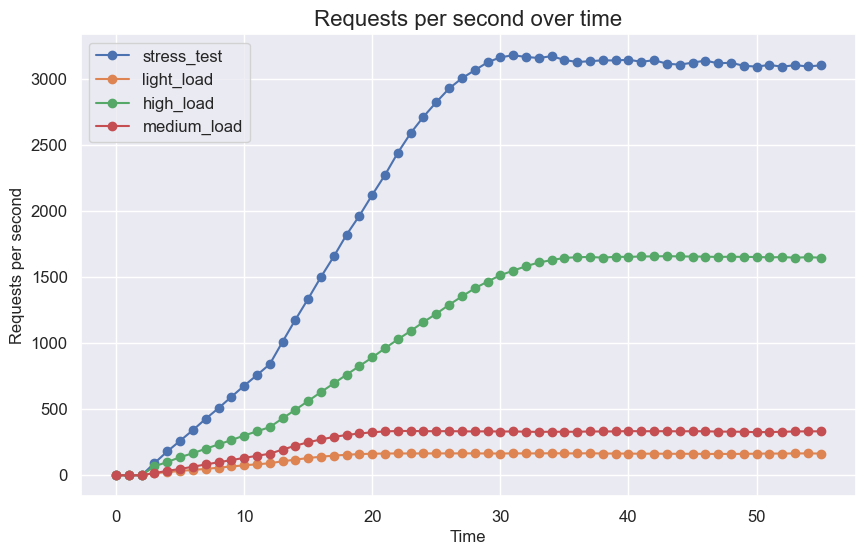

In [24]:
import pandas as pd
import os
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

plt.rcParams['font.size'] = 14
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 12


RESULTS_DIR = "load_test_results"
tests = os.listdir(RESULTS_DIR)

fig, ax = plt.subplots(figsize=(10, 6))
test_names = []

results_multiple_tests = []
for test in tests:
    if not test.endswith('history.csv'):
        continue

    test_name = test.split('_stats_history.csv')[0]
    results_history = pd.read_csv(f'{RESULTS_DIR}/{test}')
    results_history['time'] = results_history["Timestamp"] - results_history["Timestamp"].min()
    ax.plot(results_history['time'], results_history['Requests/s'], label=test_name, marker='o')

ax.legend()
ax.set_xlabel('Time')
ax.set_ylabel('Requests per second')
ax.set_title('Requests per second over time')
plt.savefig('requests_per_second_over_time.png')
plt.show()

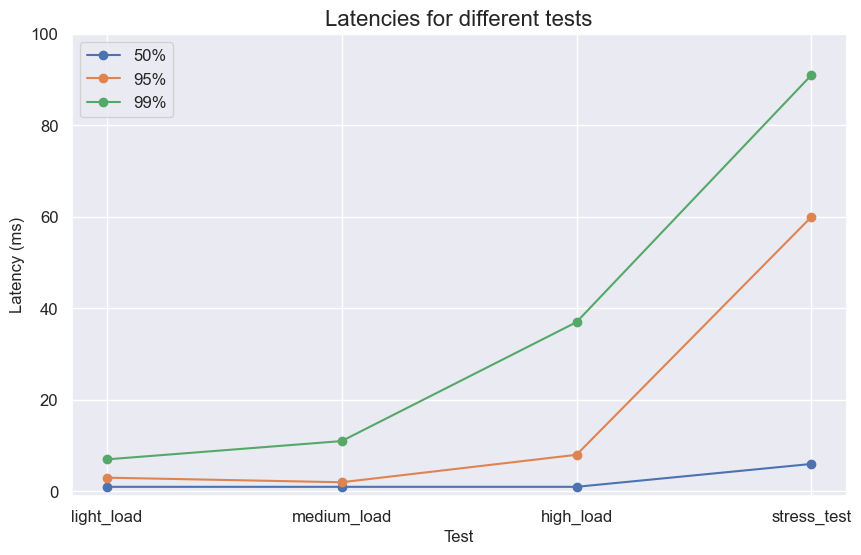

In [25]:
LATENCY_PERCENTILES = ["50", "95", "99"]

results_multiple_tests = []
for test in tests:
    if not test.endswith('stats.csv'):
        continue

    results_stats = pd.read_csv(f'{RESULTS_DIR}/{test}')
    _results_single_test = {p: results_stats[f'{p}%'].iloc[0] for p in LATENCY_PERCENTILES}
    _results_single_test["test_name"] = test.split('_stats.csv')[0]
    results_multiple_tests.append(_results_single_test)

results_multiple_tests = pd.DataFrame(results_multiple_tests).sort_values(by='99')

fig, ax = plt.subplots(figsize=(10, 6))
for percentile in LATENCY_PERCENTILES:
    ax.plot(results_multiple_tests['test_name'], results_multiple_tests[percentile], label=f'{percentile}%', marker='o')
ax.legend()
ax.set_xlabel('Test')
ax.set_ylabel('Latency (ms)')
ax.set_ylim(-1, 100)
ax.set_title('Latencies for different tests')
plt.savefig('latencies_for_different_tests.png')

In [26]:
results_multiple_tests[["test_name"] + LATENCY_PERCENTILES].rename(columns={
    "50": "50th Percentile",
    "95": "95th Percentile",
    "99": "99th Percentile"
})


,test_name,50th Percentile,95th Percentile,99th Percentile
0,light_load,1,3,7
1,medium_load,1,2,11
2,high_load,1,8,37
3,stress_test,6,60,91
